In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set(style="whitegrid")

In [11]:
df = pd.read_csv(r'C:\\Users\\KINJAL\\Desktop\\Data Science\\ComputerNetwork\\cs448b_ipasn.csv')

In [12]:
df

,date,l_ipn,r_asn,f
0,2006-07-01,0,701,1
1,2006-07-01,0,714,1
2,2006-07-01,0,1239,1
3,2006-07-01,0,1680,1
4,2006-07-01,0,2514,1
...,...,...,...,...
20798,2006-09-30,8,36351,3
20799,2006-09-30,8,36856,4
20800,2006-09-30,9,2152,1
20801,2006-09-30,9,8070,1


In [13]:
print(df.describe())

              l_ipn         r_asn              f
count  20803.000000  20803.000000   20803.000000
mean       4.228236  12138.320338      93.914243
std        3.278183   9766.324252    5764.995269
min        0.000000      3.000000       1.000000
25%        1.000000   4323.000000       1.000000
50%        4.000000   8764.000000       2.000000
75%        7.000000  17676.000000       8.000000
max        9.000000  40092.000000  784234.000000


In [14]:
print(df.isnull().sum())

date     0
l_ipn    0
r_asn    0
f        0
dtype: int64


In [15]:
df['date'] = pd.to_datetime(df['date'])

In [16]:
df

,date,l_ipn,r_asn,f
0,2006-07-01,0,701,1
1,2006-07-01,0,714,1
2,2006-07-01,0,1239,1
3,2006-07-01,0,1680,1
4,2006-07-01,0,2514,1
...,...,...,...,...
20798,2006-09-30,8,36351,3
20799,2006-09-30,8,36856,4
20800,2006-09-30,9,2152,1
20801,2006-09-30,9,8070,1


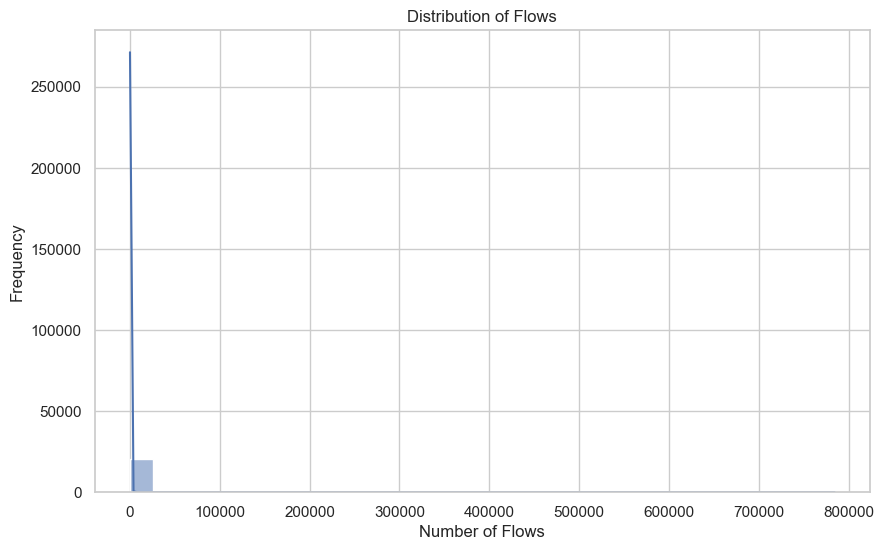

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['f'], bins=30, kde=True)
plt.title('Distribution of Flows')
plt.xlabel('Number of Flows')
plt.ylabel('Frequency')
plt.show()

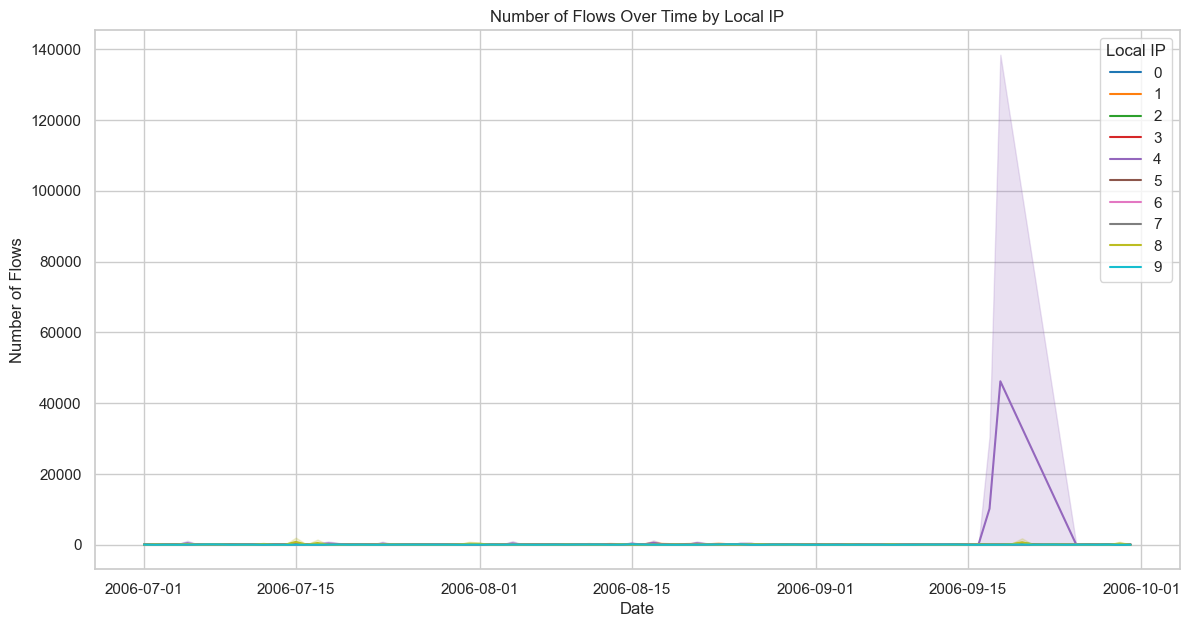

In [18]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='date', y='f', hue='l_ipn', palette='tab10')
plt.title('Number of Flows Over Time by Local IP')
plt.xlabel('Date')
plt.ylabel('Number of Flows')
plt.legend(title='Local IP')
plt.show()

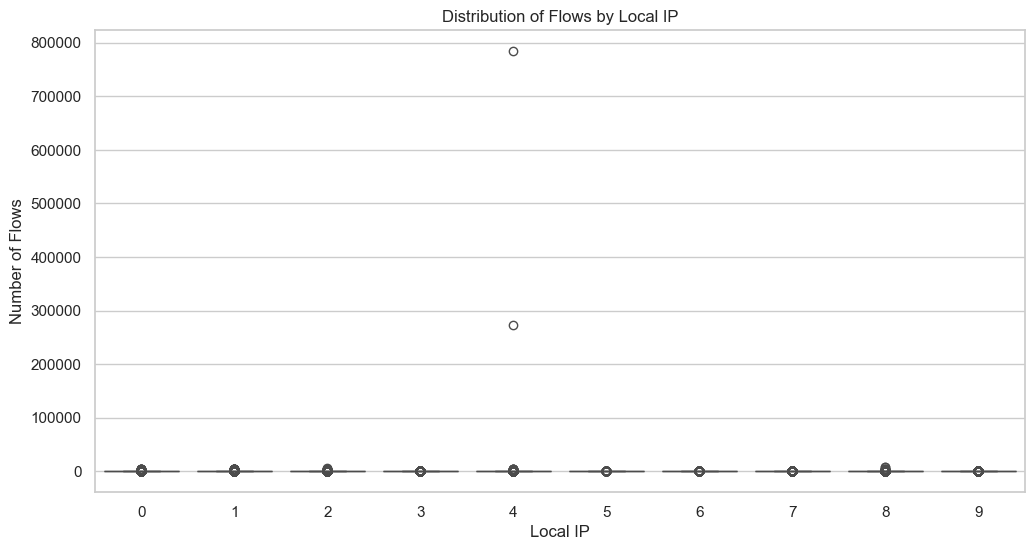

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='l_ipn', y='f')
plt.title('Distribution of Flows by Local IP')
plt.xlabel('Local IP')
plt.ylabel('Number of Flows')
plt.show()


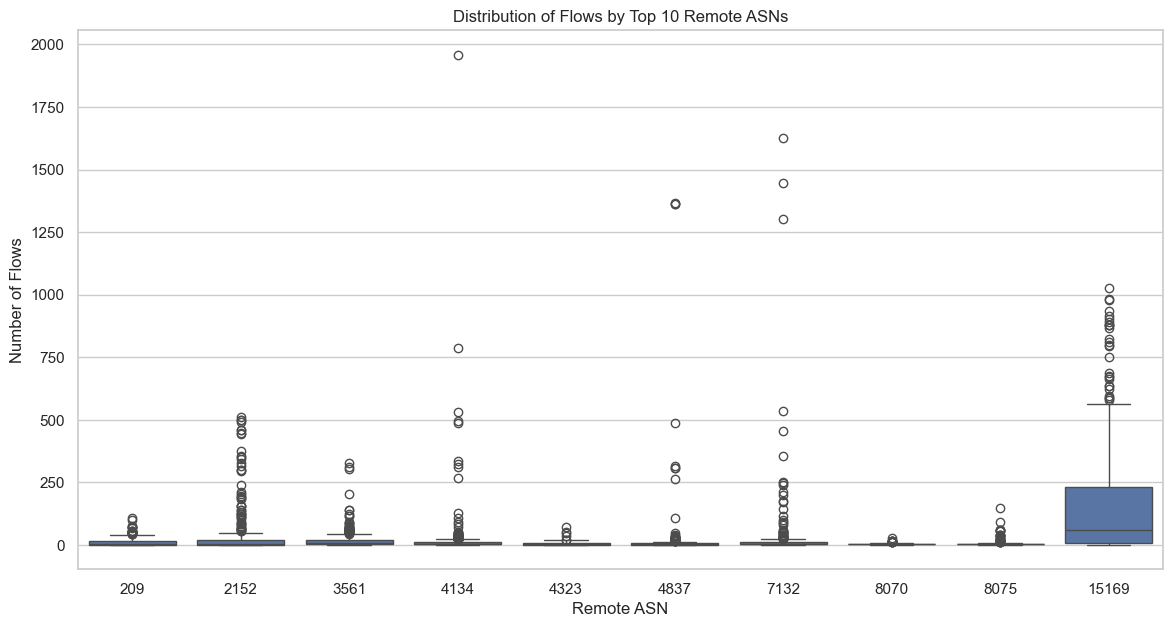

In [22]:
top_asns = df['r_asn'].value_counts().nlargest(10).index
top_asn_flows = df[df['r_asn'].isin(top_asns)]

plt.figure(figsize=(14, 7))
sns.boxplot(data=top_asn_flows, x='r_asn', y='f')
plt.title('Distribution of Flows by Top 10 Remote ASNs')
plt.xlabel('Remote ASN')
plt.ylabel('Number of Flows')
plt.show()

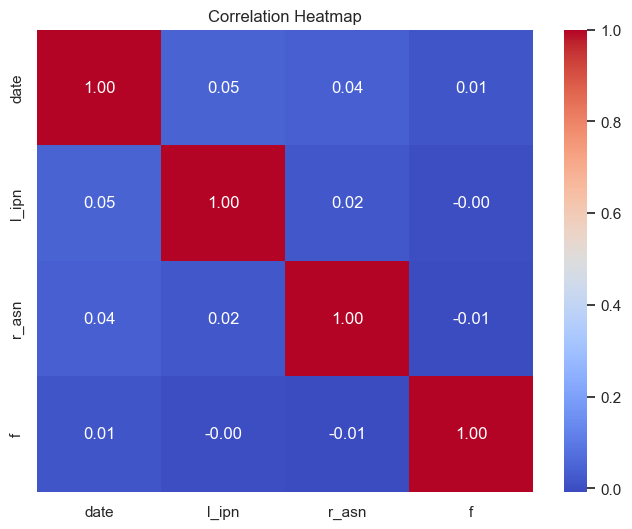

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

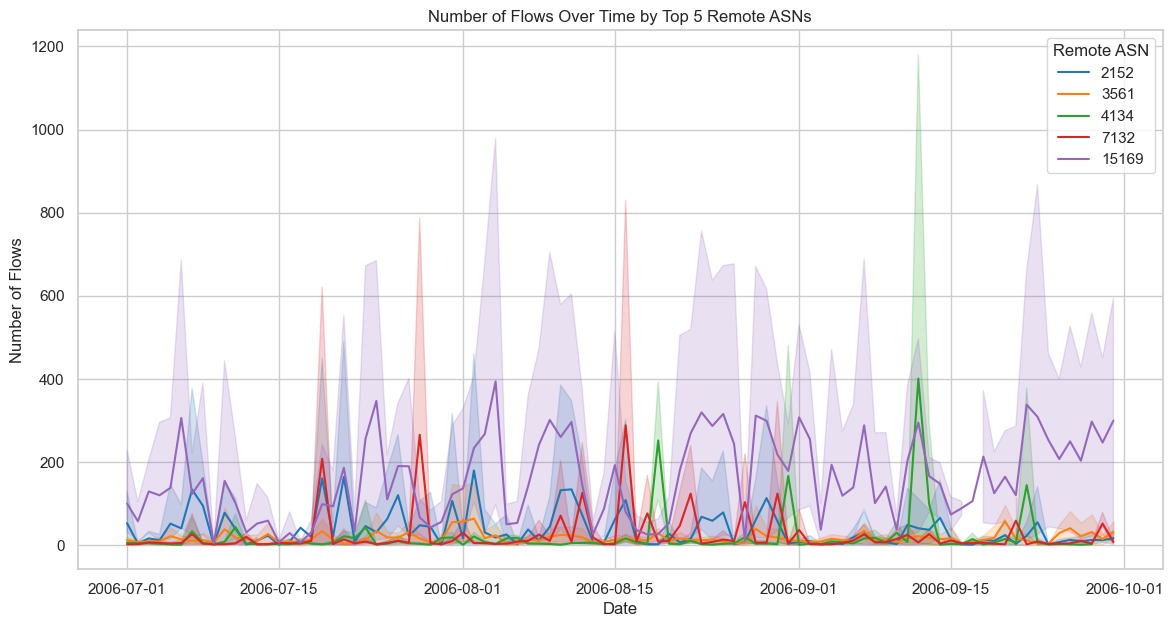

In [24]:
top_5_asns = df['r_asn'].value_counts().nlargest(5).index
top_5_asn_flows = df[df['r_asn'].isin(top_5_asns)]

plt.figure(figsize=(14, 7))
sns.lineplot(data=top_5_asn_flows, x='date', y='f', hue='r_asn', palette='tab10')
plt.title('Number of Flows Over Time by Top 5 Remote ASNs')
plt.xlabel('Date')
plt.ylabel('Number of Flows')
plt.legend(title='Remote ASN')
plt.show()